# Sampling from a GP

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
  1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
  ⋮
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
 -1.0

### We create a function to visualize the data

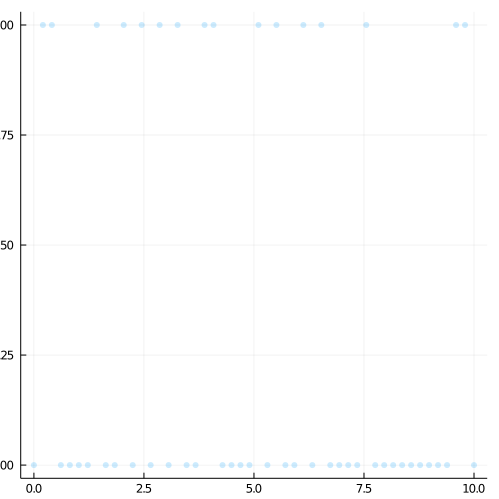

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##475 string:1
  0.584281 seconds (1.14 M allocations: 66.340 MiB, 99.35% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##475 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:05:29
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:02:47
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:01:51
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:23
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:01:06
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:00:55
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:47
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:41
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:36
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:32
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:29
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:27
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[-0.6870100261467511, -0.7447959335102616, -0.8137527969868605, -0.8840801376984718, -0.921685443571088, -0.8848577862567804, -0.7921919479312998, -0.5843045925782012, -0.3398981225468135, -0.12459772448365969  …  -1.539524591930606, -1.6395769891447847, -1.6444397105887467, -1.5091818738704146, -1.236305126912279, -0.9006052938950092, -0.5918201073195358, -0.3160112038099434, -0.14129840231206353, -0.08138364440727416]]
 [[0.45186965818061, 0.2519684561005805, -0.08954509287547344, -0.457084085109361, -0.7976324996479781, -0.9838135826774631, -1.0577967151338687, -0.9780555623551294, -0.7914558744002944, -0.5867874770814818  …  -1.4694546445911758, -1.6432429740999037, -1.7147398801058853, -1.6759279798915854, -1.5832519313905231, -1.4070450515970685, -1.2046462122985506, -0.926829347358245, -0.5846598943886252, -0.2162265924689991]]
 [[1.1670706002752125, 1.0124565668854686, 0.8299586119043105, 0.607501519908969, 0.3146335591824056, 0.0

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

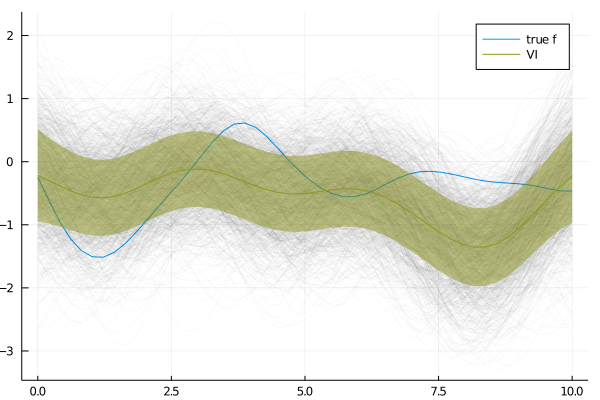

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

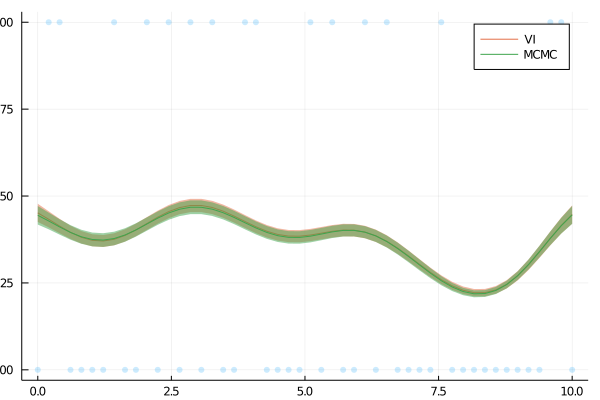

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*